# Dissipation in Runge-Kutta Methods

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import matplotlib.pyplot as pt

In [2]:
def rk4_step(y, t, h, f):
    k1 = f(t, y)
    k2 = f(t+h/2, y + h/2*k1)
    k3 = f(t+h/2, y + h/2*k2)
    k4 = f(t+h, y + h*k3)
    return y + h/6*(k1 + 2*k2 + 2*k3 + k4)

Consider the second-order harmonic oscillator

$$u''=-u$$

with initial conditions $u(0) = 1$ and $u'(0)=0$.

$\cos(x)$ is a solution to this problem.

`f` below gives the right-hand side for this ODE converted to first-order form:

In [3]:
def f(t, y):
    u, up = y
    return np.array([up, -u])

Now, we use 4th-order Runge Kutta to integrate this system over "many" time steps:

In [4]:
times = [0]
y_values = [np.array([1,0])]

h = 0.5
t_end = 800

while times[-1] < t_end:
    y_values.append(rk4_step(y_values[-1], times[-1], h, f))
    times.append(times[-1]+h)

Lastly, plot the computed solution:

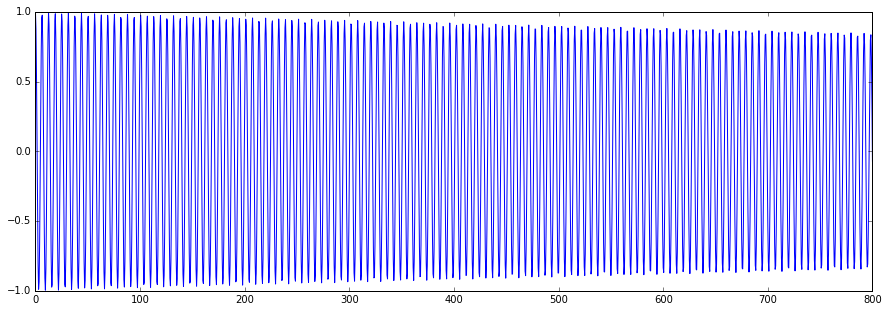

In [5]:
y_values = np.array(y_values)

pt.figure(figsize=(15,5))
pt.plot(times, y_values[:, 0])

What do you observe?